In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stockpy.neural_network import CNNRegressor, MLPRegressor, LSTMRegressor
from stockpy.probabilistic import DeepMarkovModelRegressor, BayesianCNNRegressor
from stockpy.metrics import evaluate

# read CSV file and drop missing values
df = pd.read_csv('../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
# split data into training and test set
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
input_size = X_train.shape[1]
output_size = 1
# create model instance and fit to training data
predictor = MLPRegressor(input_size=input_size, output_size=output_size)
predictor.fit(X_train, y_train, batch_size=24, epochs=10)
# predictions on test data
y_pred = predictor.predict(X_test)

  0%|          | 0/10 [00:00<?, ?it/s]

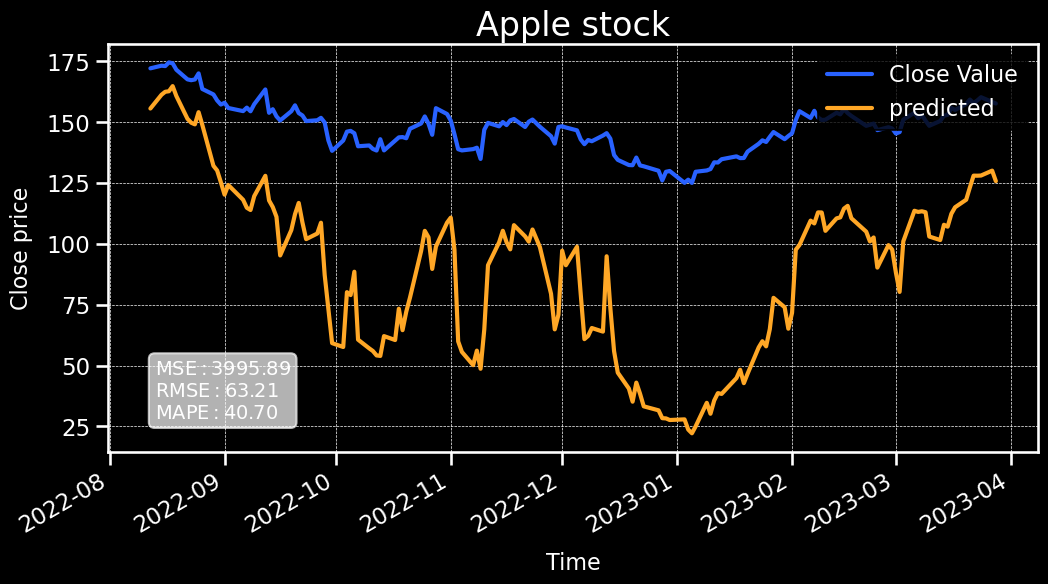

In [2]:
y_test = y_test.values.reshape(-1,1)
mse, mse_squar, mape = evaluate(y_pred=y_pred, y_test=y_test)

sns.set(style="ticks", context="talk")
plt.style.use('dark_background')
file = '../results/' + predictor.__class__.__name__ + '.png'
fig, ax = plt.subplots(figsize=(12, 6))
days = X_test.index
ax.plot(days, y_test, label='Close Value', linewidth=3, color='#2962FF')
ax.plot(days, y_pred, label='predicted', linewidth=3, color='#FFA726')
ax.set_title('Apple stock', fontsize=24, color='white')
ax.set_xlabel('Time', fontsize=16, color='white', labelpad=10)
ax.set_ylabel('Close price', fontsize=16, color='white', labelpad=10)
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Add crosses at points where predicted value matches true value
for i in range(len(days)):
    if abs(y_test[i] - y_pred[i]) < 0.1:
        ax.scatter(days[i], y_test[i], marker='X', color='white', 
                        s=100, zorder=2)

# put legend in a white box
ax.legend(fontsize=16, loc='upper right', 
          edgecolor='black')

fig.autofmt_xdate()
# these are matplotlib.patch.Patch properties
textstr = '\n'.join((
    r'$\mathrm{MSE}: %.2f$' % (mse, ),
    r'$\mathrm{RMSE}: %.2f$' % (mse_squar, ),  
    r'$\mathrm{MAPE}: %.2f$' % (mape, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.7)

# place a text box in upper left in axes coords
ax.text(0.05, 0.15, textstr, transform=ax.transAxes, fontsize=14,
        ha='left', va='center', bbox=props)
plt.savefig(file, dpi=80, facecolor='#131722')
plt.show()